In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
data =pd.read_csv(r"C:\Users\HP\Downloads\insurance-data.csv")


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape 

(1338, 7)

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Assuming 'column_name' is the name of the column for which you want unique values
unique_values = data['region'].unique()

# Print the unique values
print(unique_values)


['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# Convert categorical variables to one-hot encoding
data = pd.get_dummies(data, drop_first=True)

In [12]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [13]:
# Check the data types of each column
print(data.dtypes)

age                   int64
bmi                 float64
children              int64
charges             float64
sex_male              uint8
smoker_yes            uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object


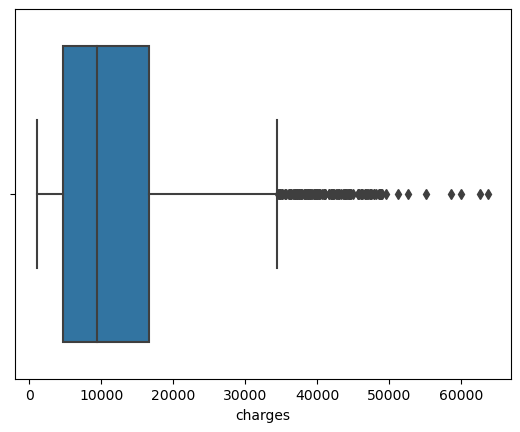

In [14]:
sns.boxplot(x=data["charges"])
plt.show()

In [15]:
# Calculate Z-scores for 'charges'
z_scores = np.abs((data['charges'] - data['charges'].mean()) / data['charges'].std())

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Identify outliers based on the threshold
outliers_charges = z_scores > threshold

# Remove outliers from the DataFrame
data_no_outliers = data[~outliers_charges]


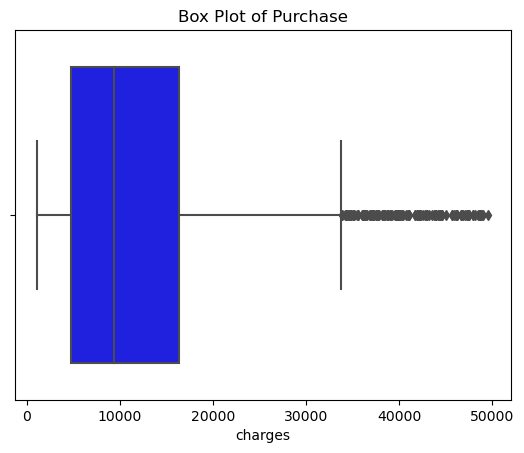

In [16]:
# without outlier
sns.boxplot(x=data_no_outliers['charges'], color='blue')
plt.xlabel('charges')
plt.title('Box Plot of Purchase')
plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   uint8  
 5   smoker_yes        1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB


In [18]:
correlation = data.corr()
correlation

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


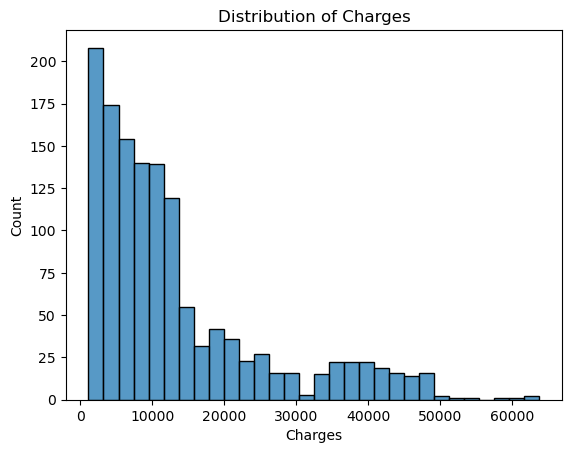

In [19]:
# Visualize the distribution of the target variable
sns.histplot(data['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Distribution of Charges')
plt.show()

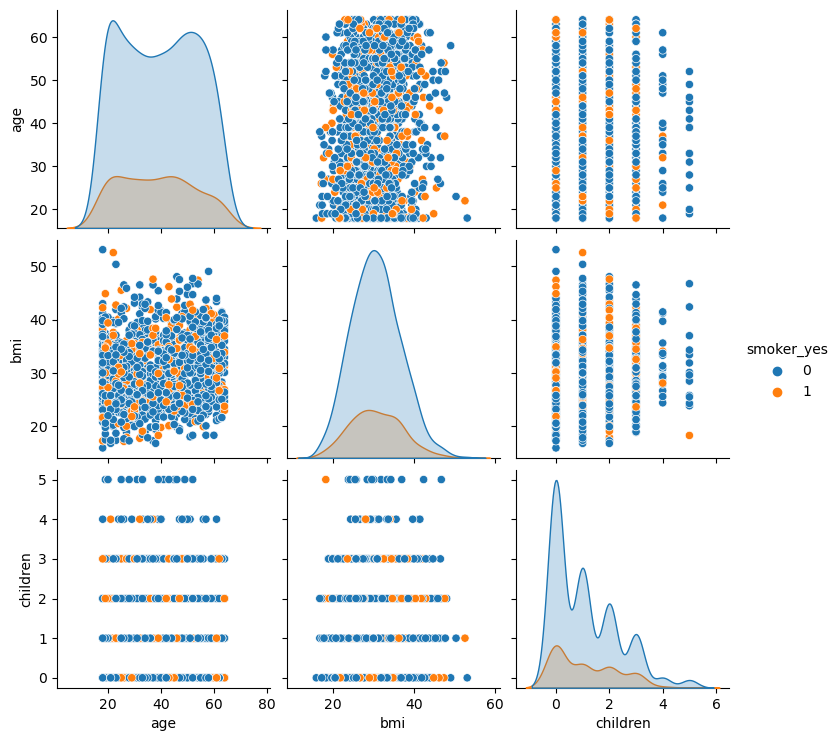

In [20]:
# Visualize the relationship between features and target variable
sns.pairplot(data, vars=['age', 'bmi', 'children'], hue='smoker_yes')
plt.show()

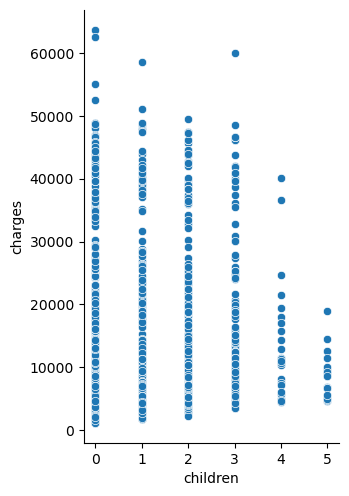

In [21]:
# Data Visualization
sns.pairplot(data, x_vars=['children'], y_vars='charges', height=5, aspect=0.7)
plt.show()

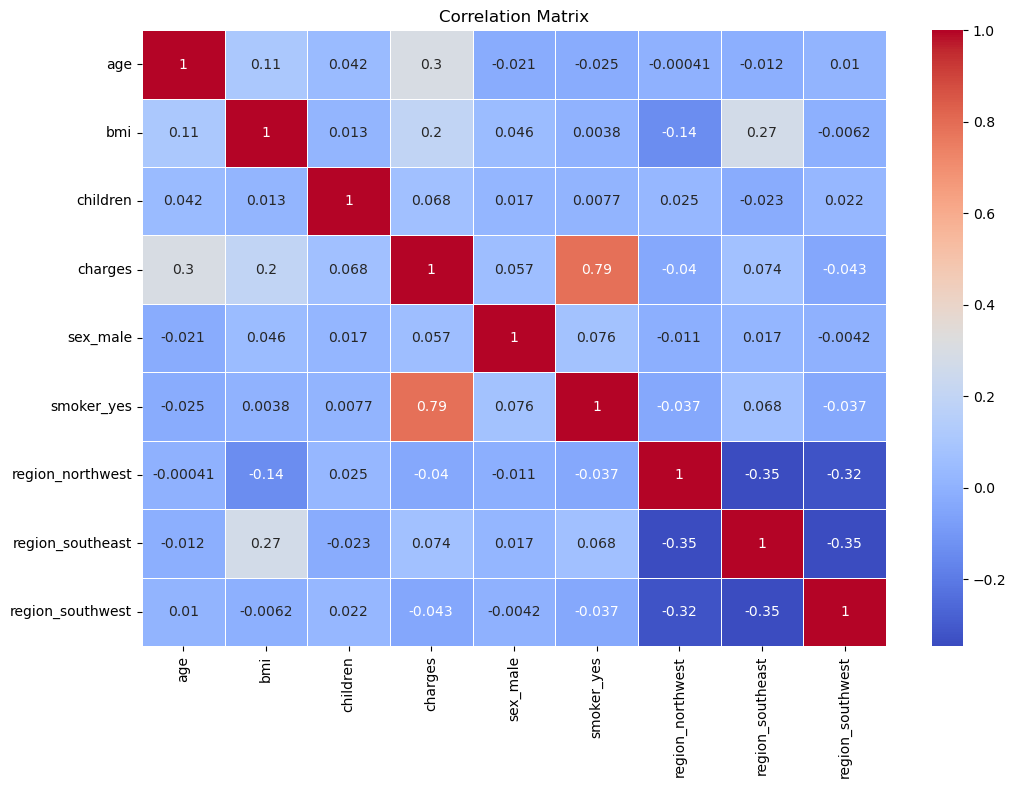

In [22]:
# Data Visualization - Correlation Matrix 
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [23]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [24]:
# Split the data into features and target variable
X = data.drop('charges', axis=1)
y = data['charges']


In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Step 5: Machine Learning Models
# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Support Vector Regression', SVR()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('KNN Regression', KNeighborsRegressor()),
     ('Gradient Boosting Regression', GradientBoostingRegressor())
]

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with a StandardScaler and Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Define hyperparameters for grid search
lr_hyperparameters = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False],
    'regressor__copy_X': [True, False],
    'regressor__n_jobs': [None, 1, 2, 4]
}

# Perform grid search
lr_search = GridSearchCV(pipeline, lr_hyperparameters, cv=5, scoring='neg_mean_squared_error')
lr_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Hyperparameters:", lr_search.best_params_)
print("Best Score:", lr_search.best_score_)


Best Hyperparameters: {'regressor__copy_X': True, 'regressor__fit_intercept': True, 'regressor__n_jobs': None, 'regressor__positive': True}
Best Score: -37783630.02296721


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Create a pipeline with a Support Vector Regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('Support Vector Regression', SVR())
])

# Define hyperparameters for grid search
svr_hyperparameters = {
    'Support Vector Regression__C': [0.1, 1, 10],
    'Support Vector Regression__kernel': ['linear', 'rbf', 'poly'],
    # Add other hyperparameters for SVR if needed
}

# Perform grid search
svr_search = GridSearchCV(pipeline, svr_hyperparameters, cv=5, scoring='neg_mean_squared_error')
svr_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Hyperparameters:", svr_search.best_params_)
print("Best Negative Mean Squared Error:", svr_search.best_score_)

# Optionally, you can evaluate the model on the test set
test_score = svr_search.score(X_test, y_test)
print("Test set Negative Mean Squared Error:", test_score)


Best Hyperparameters: {'Support Vector Regression__C': 10, 'Support Vector Regression__kernel': 'linear'}
Best Negative Mean Squared Error: -85494755.14291182
Test set Negative Mean Squared Error: -76521429.45507242


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Create a pipeline with a Decision Tree Regression model
pipeline = Pipeline([
    ('Decision Tree Regression', DecisionTreeRegressor())
])

# Define hyperparameters for grid search
dt_hyperparameters = {
    'Decision Tree Regression__max_depth': [None, 5, 10, 15],
    'Decision Tree Regression__min_samples_split': [2, 5, 10],
    'Decision Tree Regression__min_samples_leaf': [1, 2, 4],
    # Add other hyperparameters for Decision Tree Regression if needed
}

# Perform grid search
dt_search = GridSearchCV(pipeline, dt_hyperparameters, cv=5, scoring='neg_mean_squared_error')
dt_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Hyperparameters:", dt_search.best_params_)
print("Best Negative Mean Squared Error:", dt_search.best_score_)

# Optionally, you can evaluate the model on the test set
test_score = dt_search.score(X_test, y_test)
print("Test set Negative Mean Squared Error:", test_score)


Best Hyperparameters: {'Decision Tree Regression__max_depth': 5, 'Decision Tree Regression__min_samples_leaf': 4, 'Decision Tree Regression__min_samples_split': 2}
Best Negative Mean Squared Error: -23566580.54093023
Test set Negative Mean Squared Error: -20416835.69950212


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Create a pipeline with a Random Forest Regression model
pipeline = Pipeline([
    ('Random Forest Regression', RandomForestRegressor())
])

# Define hyperparameters for grid search
rf_hyperparameters = {
    'Random Forest Regression__n_estimators': [50, 100, 200],
    'Random Forest Regression__max_depth': [None, 5, 10, 15],
    'Random Forest Regression__min_samples_split': [2, 5, 10],
    'Random Forest Regression__min_samples_leaf': [1, 2, 4],
    # Add other hyperparameters for Random Forest Regression if needed
}

# Perform grid search
rf_search = GridSearchCV(pipeline, rf_hyperparameters, cv=5, scoring='neg_mean_squared_error')
rf_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Hyperparameters:", rf_search.best_params_)
print("Best Negative Mean Squared Error:", rf_search.best_score_)

# Optionally, you can evaluate the model on the test set
test_score = rf_search.score(X_test, y_test)
print("Test set Negative Mean Squared Error:", test_score)


Best Hyperparameters: {'Random Forest Regression__max_depth': 5, 'Random Forest Regression__min_samples_leaf': 4, 'Random Forest Regression__min_samples_split': 2, 'Random Forest Regression__n_estimators': 100}
Best Negative Mean Squared Error: -21714602.397706978
Test set Negative Mean Squared Error: -19006590.779667903


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Create a pipeline with a KNN Regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('KNN Regression', KNeighborsRegressor())
])

# Define hyperparameters for grid search
knn_hyperparameters = {
    'KNN Regression__n_neighbors': [3, 5, 7],
    'KNN Regression__weights': ['uniform', 'distance'],
    'KNN Regression__p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
    # Add other hyperparameters for KNN Regression if needed
}

# Perform grid search
knn_search = GridSearchCV(pipeline, knn_hyperparameters, cv=5, scoring='neg_mean_squared_error')
knn_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Hyperparameters:", knn_search.best_params_)
print("Best Negative Mean Squared Error:", knn_search.best_score_)

# Optionally, you can evaluate the model on the test set
test_score = knn_search.score(X_test, y_test)
print("Test set Negative Mean Squared Error:", test_score)


Best Hyperparameters: {'KNN Regression__n_neighbors': 7, 'KNN Regression__p': 1, 'KNN Regression__weights': 'distance'}
Best Negative Mean Squared Error: -31363089.871765006
Test set Negative Mean Squared Error: -29831576.003246624


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Create a pipeline with a Gradient Boosting Regression model
pipeline = Pipeline([
    ('Gradient Boosting Regression', GradientBoostingRegressor())
])

# Define hyperparameters for grid search
gb_hyperparameters = {
    'Gradient Boosting Regression__n_estimators': [50, 100, 200],
    'Gradient Boosting Regression__learning_rate': [0.01, 0.1, 0.2],
    'Gradient Boosting Regression__max_depth': [3, 5, 7],
    'Gradient Boosting Regression__min_samples_split': [2, 5, 10],
    'Gradient Boosting Regression__min_samples_leaf': [1, 2, 4],
    # Add other hyperparameters for Gradient Boosting Regression if needed
}

# Perform grid search
gb_search = GridSearchCV(pipeline, gb_hyperparameters, cv=5, scoring='neg_mean_squared_error')
gb_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Hyperparameters:", gb_search.best_params_)
print("Best Negative Mean Squared Error:", gb_search.best_score_)

# Optionally, you can evaluate the model on the test set
test_score = gb_search.score(X_test, y_test)
print("Test set Negative Mean Squared Error:", test_score)
    

Best Hyperparameters: {'Gradient Boosting Regression__learning_rate': 0.1, 'Gradient Boosting Regression__max_depth': 3, 'Gradient Boosting Regression__min_samples_leaf': 4, 'Gradient Boosting Regression__min_samples_split': 10, 'Gradient Boosting Regression__n_estimators': 50}
Best Negative Mean Squared Error: -21426895.485201895
Test set Negative Mean Squared Error: -18722077.403781872


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


# Iterate over the models
for name, model in models:
    # Create a pipeline with preprocessing steps (if needed) and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Example preprocessing step
        ('model', model)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print evaluation metrics
    print("Model:", name)
    print("Mean Squared Error:", mse)
    print("Best Parameters:", pipeline.named_steps['model'].get_params())  # Print best parameters
    print("R-squared (Accuracy):", r2)
    print("______________________________________________________")


Model: Linear Regression
Mean Squared Error: 33596915.85136147
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
R-squared (Accuracy): 0.7835929767120723
______________________________________________________
Model: Support Vector Regression
Mean Squared Error: 166128803.80848217
Best Parameters: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
R-squared (Accuracy): -0.07008155372454805
______________________________________________________
Model: Decision Tree Regression
Mean Squared Error: 46858194.88710663
Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
R-squared (Accuracy): 0.6981734121

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer


# Dictionary to store mean accuracy scores for each model
accuracy_scores = {}

# Define scoring metric (accuracy in this case)
scoring_metric = make_scorer(r2_score)

# Evaluate each model using cross-validation
for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    # Calculate cross-validated accuracy scores
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=scoring_metric)
    
    # Store mean accuracy score in the dictionary
    accuracy_scores[name] = scores.mean()

# Find the model with the highest accuracy
best_model = max(accuracy_scores, key=accuracy_scores.get)

# Print the results
print("Accuracy Scores:")
for name, score in accuracy_scores.items():
    print(f"{name}: {score}")

print("\nBest Model based on Accuracy:")
print(f"{best_model}: {accuracy_scores[best_model]}")


Accuracy Scores:
Linear Regression: 0.7331101109097584
Support Vector Regression: -0.0989037100538483
Decision Tree Regression: 0.6771857750364455
Random Forest Regression: 0.8241146468048652
KNN Regression: 0.7710135533777078
Gradient Boosting Regression: 0.8411441418866886

Best Model based on Accuracy:
Gradient Boosting Regression: 0.8411441418866886
